In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Previsão com séries temporais (ARIMA)

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA

import pmdarima
from pmdarima import auto_arima
from pmdarima.arima import auto_arima

from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
# Carregamento da base de dados
base = pd.read_csv('dataset-tensao-barras-mes-jan-2021.csv', skiprows=0, sep = ';')
base.head(5)
#base.shape

,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
0,OTLM,BSBP4-01,2021-01-01 00:00:00,01/01/2021 00:00:00,2021-01-01,01/01/2021,00:00,0,68.0,69.0,...,DIA_UTIL,-1,-1,t,-1,-1,-1,-1,t,valor_referencia
1,OTLM,BSBP4-01,2021-01-01 00:01:00,01/01/2021 00:01:00,2021-01-01,01/01/2021,00:01,1,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
2,OTLM,BSBP4-01,2021-01-01 00:02:00,01/01/2021 00:02:00,2021-01-01,01/01/2021,00:02,2,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
3,OTLM,BSBP4-01,2021-01-01 00:03:00,01/01/2021 00:03:00,2021-01-01,01/01/2021,00:03,3,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
4,OTLM,BSBP4-01,2021-01-01 00:04:00,01/01/2021 00:04:00,2021-01-01,01/01/2021,00:04,4,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN


In [4]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

base.describe(include="all")

codregional               object
barra                     object
data_hora                 object
data_hora_v2              object
data                      object
data_v2                   object
horario                   object
nminuto                    int64
lim_inf                  float64
lim_recom                float64
lim_sup                  float64
valor_tensao             float64
status_carga_1            object
status_carga_2            object
id_tipo_dia                int64
tipo_dia                  object
id_tipo_carga              int64
tipo_carga                object
is_calcular_dtf           object
bit_ddf                    int64
bit_fdf                    int64
bit_fdf_acls               int64
bit_fdf_abli               int64
is_preprocessado          object
tipo_preprocessamento     object
dtype: object


,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
count,535680,535680,535680,535680,535680,535680,535680,535680.000000,535680.000000,535680.000000,...,535680,535680.000000,535680,535680,535680.000000,535680.000000,535680.000000,535680.000000,535680,56040
unique,1,12,44640,44640,31,31,1440,NaN,NaN,NaN,...,3,NaN,5,1,NaN,NaN,NaN,NaN,2,1
top,OTLM,BSBP4-01,2021-01-25 15:32:00,12/01/2021 02:54:00,2021-01-15,25/01/2021,23:07,NaN,NaN,NaN,...,DIA_UTIL,NaN,CARGA_MEDIA,t,NaN,NaN,NaN,NaN,f,valor_referencia
freq,535680,44640,12,12,17280,17280,372,NaN,NaN,NaN,...,362880,NaN,290275,535680,NaN,NaN,NaN,NaN,479640,56040
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,80.793526,82.146074,...,NaN,2.555081,NaN,NaN,0.745923,-0.059767,-0.091626,-0.117604,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.692482,26.216539,26.772780,...,NaN,1.395527,NaN,NaN,0.631468,0.381956,0.375589,0.368282,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,67.500000,68.500000,...,NaN,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.750000,68.500000,69.500000,...,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,69.000000,70.000000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.250000,70.000000,71.500000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
base['data'] = pd.to_datetime(base['data'])
base['data_v2'] = pd.to_datetime(base['data_v2'])
base['data_hora'] = pd.to_datetime(base['data_hora'])
base['data_hora_v2'] = pd.to_datetime(base['data_hora_v2'])

In [8]:
df_aux = base[['barra','data','horario','data_hora','lim_inf','lim_recom','lim_sup','valor_tensao'] ]
df_aux.dtypes

barra                   object
data            datetime64[ns]
horario                 object
data_hora       datetime64[ns]
lim_inf                float64
lim_recom              float64
lim_sup                float64
valor_tensao           float64
dtype: object

In [ ]:
df_aux

In [9]:
n_data=7
n_precisao=144

str_barra = 'PFBP4-01' 
dt_data_ini = '2021-01-01'
dt_data_fim = '2021-01-0' + str(n_data)

df = base
df = df_aux.loc[(df_aux.barra == str_barra) & ( df_aux.data >= dt_data_ini ) & (df_aux.data <= dt_data_fim) & (df_aux.horario.str.endswith('00')  ) ]
df = df[['barra','data','horario','data_hora','lim_inf','lim_recom','lim_sup','valor_tensao'] ]

In [18]:
df

,lim_inf,lim_recom,lim_sup,valor_tensao
357120,69.0,70.0,70.5,70.00
357180,69.0,70.0,70.5,69.95
357240,69.0,70.0,70.5,70.43
357300,69.0,70.0,70.5,70.40
357360,69.0,70.0,70.5,70.69
...,...,...,...,...
366900,69.5,70.3,71.0,70.02
366960,69.5,70.3,71.0,70.19
367020,69.5,70.3,71.0,69.98
367080,69.5,70.3,71.0,70.53


In [11]:
ts = df['valor_tensao']
ts.index = df['data_hora']

In [ ]:
ts[:]

In [12]:
df = df[['lim_inf','lim_recom','lim_sup','valor_tensao'] ]

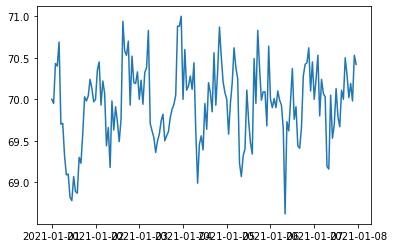

In [13]:
# Visualização da série temporal completa
plt.plot(ts)

In [14]:
# Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\Users\newto\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\newto\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.valor_tensao   No. Observations:                  167
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -77.601
Method:                       css-mle   S.D. of innovations              0.381
Date:                Wed, 31 Mar 2021   AIC                            167.201
Time:                        16:20:55   BIC                            185.909
Sample:                    01-01-2021   HQIC                           174.794
                         - 01-07-2021                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0014      0.001      0.995      0.320      -0.001       0.004
ar.L1.D.valor_tensao    -0.4000      0.100     -4.006      0.000      -0.596      -0.204
ar.L2.D.valor_tensao     0.5903      0.073      8.080      0.000       0.447       0.734
ma.L1.D.valor_tensao    -0.0108      0.092     -0.117      0.906      -0.191       0.169
ma.L2.D.valor_tensao    -0.9892      0.092    -10.762      0.000      -1.169      -0.809
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0061           +0.0000j            1.0061            0.5000
AR.2            1.6836           +0.0000j            1.6836            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0109           +0.0000j            1.0109            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 84)[0]
previsoes

array([70.26095244, 70.20064496, 70.13204165, 70.12504696, 70.08851347,
       70.10016477, 70.07510569, 70.09317513, 70.07232285, 70.09249863,
       70.07328734, 70.09405023, 70.07557287, 70.09638882, 70.0783235 ,
       70.09900596, 70.08123728, 70.10172229, 70.08420771, 70.10447453,
       70.08719721, 70.10724033, 70.09019256, 70.1100118 , 70.09318908,
       70.11278614, 70.09618515, 70.11556237, 70.0991802 , 70.11834011,
       70.10217404, 70.12111924, 70.10516661, 70.12389968, 70.10815791,
       70.12668142, 70.11114794, 70.12946442, 70.11413671, 70.13224868,
       70.11712424, 70.13503417, 70.12011054, 70.13782088, 70.12309563,
       70.1406088 , 70.12607952, 70.14339791, 70.12906222, 70.14618819,
       70.13204376, 70.14897964, 70.13502414, 70.15177224, 70.13800338,
       70.15456597, 70.14098149, 70.15736082, 70.14395848, 70.16015678,
       70.14693438, 70.16295384, 70.14990919, 70.16575197, 70.15288293,
       70.16855117, 70.1558556 , 70.17135143, 70.15882723, 70.17

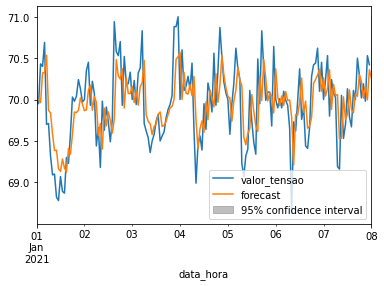

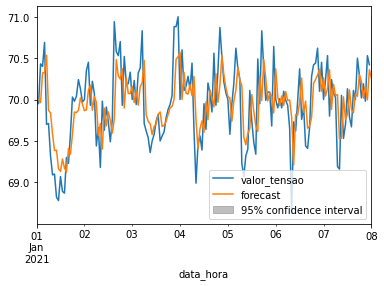

In [24]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('2021-01-01', '2021-01-08',
                             ax = eixo, plot_insample = False)

In [ ]:
modelo_treinado.summary()

In [ ]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 36, seasonal = True, trace = False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
#ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157

In [ ]:
proximos = modelo_auto.predict(n_periods = 36)
# Visualização dos próximos 12 valores
proximos

In [ ]:
proximos.shape

In [ ]:
# Visualize the forecasts (blue=train, green=forecasts)

n_data=5
n_precisao=144

x = np.arange(n_data*n_precisao )
plt.plot(x,ts, c='blue')
plt.plot(x, proximos, c='green')
plt.show()